# Logistic Regression

Please note that this code is old. These tests were conducted before the optimization and development of the Preprocess class.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from logistic_regression import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
raw_train_data = "../data/train.csv"
raw_test_data = "../data/test.csv"

In [38]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

## OPTIONAL STEP: feature selection
# cols = [
#     "lat",
#     "Z1000",
#     "Z200",
#     "TMQ",
#     "PSL",
#     "U850",
#     "VBOT",
#     "TS",
#     "QREFHT",
#     "UBOT",
#     "time",
# ]
# raw_data = raw_data[cols + ["Label"]]

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_data, test_size=0.33#, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')


Training a model without regularizer and high number of iterations

In [39]:
# Create and train the model
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=2000, regularizer=0)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8288327220317376
Epoch 200, cross entropy loss: 0.7810605029190739
Epoch 300, cross entropy loss: 0.7626222646672134
Epoch 400, cross entropy loss: 0.7509607830835595
Epoch 500, cross entropy loss: 0.742043659298631
Epoch 600, cross entropy loss: 0.7348061801842695
Epoch 700, cross entropy loss: 0.7287748861603649
Epoch 800, cross entropy loss: 0.7236528818360525
Epoch 900, cross entropy loss: 0.7192296313835093
Epoch 1000, cross entropy loss: 0.7153507857919972
Epoch 1100, cross entropy loss: 0.7119021665785337
Epoch 1200, cross entropy loss: 0.7087990097478425
Epoch 1300, cross entropy loss: 0.7059782018582907
Epoch 1400, cross entropy loss: 0.7033925812622689
Epoch 1500, cross entropy loss: 0.7010067450857224
Epoch 1600, cross entropy loss: 0.6987939657206557
Epoch 1700, cross entropy loss: 0.696733924417611
Epoch 1800, cross entropy loss: 0.6948110450955993
Epoch 1900, cross entropy loss: 0.69301326810

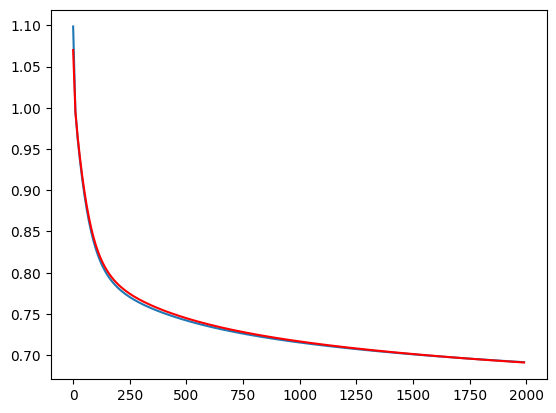

In [40]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Training a model without regularizer and low number of iterations

In [41]:
# Create and train the model.
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=200, regularizer=0)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8288327220317376
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9114  887 1720]
 [ 212  361    5]
 [ 711   91 1670]] 

Accuracy:
0.7545 

Precision:
0.5565 

Recall:
0.6926 

F1 Score:
0.6171


## Adding regularizer

In [42]:
# Create and train the model.
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8591674717485175
Epoch 200, cross entropy loss: 0.829069233524812
Epoch 300, cross entropy loss: 0.8236590938779967
Epoch 400, cross entropy loss: 0.8235379655877284
Epoch 500, cross entropy loss: 0.8255456166922973
Epoch 600, cross entropy loss: 0.8288924549424719
Epoch 700, cross entropy loss: 0.8332243816922598
Epoch 800, cross entropy loss: 0.8383185495499988
Epoch 900, cross entropy loss: 0.8440200572358992
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9924  551 1246]
 [ 277  300    1]
 [ 894   66 1512]] 

Accuracy:
0.7945 

Precision:
0.5899 

Recall:
0.6591 

F1 Score:
0.6226


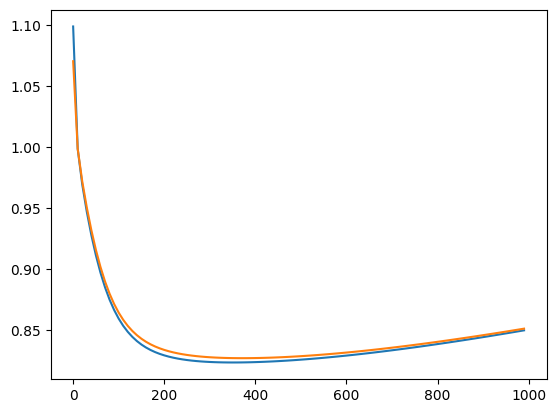

In [43]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors
)